## Single Variable Linear Regression
In this notebook, I workout Gradient Descent algorithm for Single Variable Linear Regression. No built-in models used. Using square error as cost function.

In [1]:
# import
import pandas as pd
from pylab import *
import numpy as np

In [2]:
# test data
data = {1:1, 2:2, 3:3, 4:4}
print('Data:', data)

# setup global variables
theta0 = 0
theta1 = 0
learning_rate = 0.01 # alpha
threshold = 0.001

Data: {1: 1, 2: 2, 3: 3, 4: 4}


In [3]:
# format to return 4 decimal places
def format_result(result):
    return round(result, 4)

## Linear Hypothesis:
In the case of single variable, we use following equation
$$ h(x) = \theta_0 + {\theta_1}{x} $$

## Sum Square Error:
Our goal is to minimize sum square error
$$ E(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2 $$

In [4]:
# hypothesis
def h_x(theta0, theta1, x):
    return theta0 + theta1 * x

# sum square error
def cost_function(theta0, theta1):
    error = 0
    for x in data:
        error += (h_x(theta0, theta1, x) - data[x])**2
    
    # factor in 1/2m
    error = (1 / (2 * len(data))) * error
    return format_result(error)

# test
print('Error:', cost_function(0, 0))

Error: 3.75


## Gradients
$$ \frac{\partial}{\partial\theta_0} = \frac{1}{m} \sum_1^m (h(x^{(i)}) - y^{(i)}) $$
$$ \frac{\partial}{\partial\theta_1} = \frac{1}{m} \sum_1^m (h(x^{(i)}) - y^{(i)}) x^{(i)} $$

In [5]:
# gradient theta0
def gradient_theta0(theta0, theta1):
    gradient = 0
    for x in data:
        gradient += (h_x(theta0, theta1, x) - data[x])
    
    # factor in 1/m
    gradient = (1 / len(data)) * gradient
    return format_result(gradient)

# gradient theta1
def gradient_theta1(theta0, theta1):
    gradient = 0
    for x in data:
        gradient += (h_x(theta0, theta1, x) - data[x]) * x
    
    # factor in 1/m
    gradient = (1 / len(data)) * gradient
    return format_result(gradient)

## Gradient Descent Algorithm
While not within threshold: (simultaneous update)
$$ temp_0 = \theta_0 - \alpha \frac{d}{d\theta_0} $$
$$ temp_1 = \theta_1 - \alpha \frac{d}{d\theta_1} $$
$$ \theta_0 = temp_0 $$
$$ \theta_1 = temp_1 $$

In [6]:
# gradient descent
def gradient_descent(theta0, theta1):    
    # simultaneous update
    temp0 = theta0 - learning_rate * gradient_theta0(theta0, theta1)
    temp1 = theta1 - learning_rate * gradient_theta1(theta0, theta1)
    return (format_result(temp0), format_result(temp1))

In [7]:
def linear_regression_single_variable(theta0, theta1):
    # keep going if error is not within threshold
    while cost_function(theta0, theta1) > threshold:
        # temp thetas
        (new_theta0, new_theta1) = gradient_descent(theta0, theta1)
        # simultaneous update
        (theta0, theta1) = (new_theta0, new_theta1)        
    return (theta0, theta1)

(theta0, theta1) = linear_regression_single_variable(theta0, theta1)
print('(theta0, theta1):', (theta0, theta1), 'Error:', cost_function(theta0, theta1))

(theta0, theta1): (0.112, 0.962) Error: 0.001


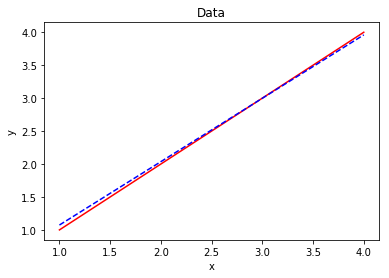

In [8]:
s = pd.Series(data)

# plot actual data, red
plot(s, 'r')
xlabel('x')
ylabel('y')
title('Data')

# plot hypothesis, blue
x = np.linspace(1, 4, 4)
y = theta0 + theta1 * x
plot(x, y, 'b--')

show()